### Overview :
This Script  will give you an idea of how to do web scraping using selenium .
Here, we will scrape data from a job portal — naukri.com.
Objectives:
Collect all necessary information of job vacancies and get the insights out of it.
What are the information are we going to collect ? — Job title, employer name, experience require for that job ,salary , location, skills require and when the job was posted .
What are the insights are we going to get from the data? — Number of vacancies are available based on each employer , what are the important skills employers are looking ? Number of vacancies available based on each city.
Why are we using selenium ? — Primarily ,Selenium is a test automation tool but we can also use this as a web data scarping tool . Selenium is very help full to collect data from dynamic pages . On the other hand, data scraping tool like beautiful soup can not scrape data from dynamic pages .. Beautiful soup is primarily used for collecting static content from web pages . Based on my analysis , almost all web portals are now using dynamic content in one or another way . Therefore , its good to go with selenium .


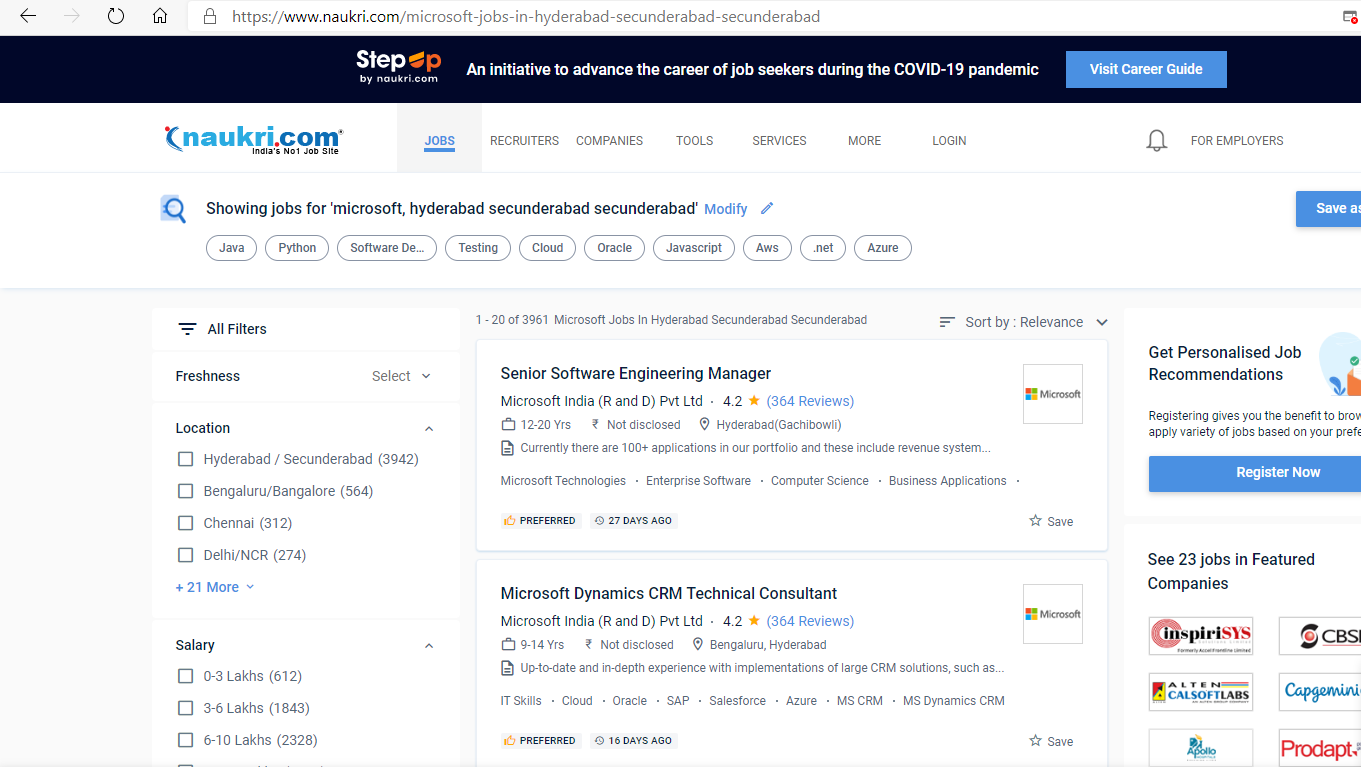

### Installation 
Skip in case you have already installed 

In [1]:
# #The following libraries are required for successful execution of this code.

# !pip install pandas
# !conda install seaborn
# !pip install selenium

Import all necessary libraries 

In [2]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from selenium import webdriver
import time
import os
import csv
import pandas as pd
from math import ceil
from datetime import date
import sys

### Controls
Script will execute based on the below variables/controls . Please understand them properly before executing the script

Below code is going to search for data science jobs (mentioned in the “Keywords” variable) . Here , I have not mentioned any location , that means , script is going to search for data science jobs across India . You can also mention any specific location in the request URL if you want. You can also mention multiple Keywords as Machine Learning , Business Analytics etc. Script will take one key word at a time and go through 200 pages (look at the page_count variable ). That means, if a single page is having 20 jobs posted then, its going to give you 200*20=2K jobs information . If you mention 3 key words than it will give you 6K jobs . Don’t worry , the full code is available in the following github repo -

In [3]:
#Create variables for different files and companies
global raw_csv_file 
dateTimeObj = date.today()
# Raw Data will be stored in the following file
raw_csv_file = os.getcwd()+"\\Job_Portal_Analysis"+str(dateTimeObj)+".csv"
print(raw_csv_file)
#Processed data will be stored in the following file
processed_csv_file = os.getcwd()+"\\Hyderabad_ChandraShekhar_Bhakat"+str(dateTimeObj)+".csv"

# based on the below key words , search will be done on naukri.com
keywords = ["Data Science"]
#The script will scrape the data Based on the below page_count variable.
page_count = 200

# Get the actual URLs with a list comprehension using the above list
# company_pages = ["https://www.naukri.com/"+keywords+"-jobs-in-hyderabad-secunderabad-secunderabad" for company in companies]
company_pages = ["https://www.naukri.com/"+keyword+"-jobs" for keyword in keywords]
print(company_pages)

C:\Users\chbhakat\Desktop\Job_Portal_Analysis2020-08-17.csv
['https://www.naukri.com/Data Science-jobs']


In [4]:
#Get job title
def get_title(position):
    try:
        title=position.find_element_by_xpath('.//a[@class = "title fw500 ellipsis"]').text
        return title
    except:
        position=""

In [5]:
#Get company name
def get_companyname(position):
    try:
        company=position.find_element_by_xpath('.//a[@class = "subTitle ellipsis fleft"]').text
        return company
    except:
        company=""
           

In [6]:
# Get total expirence required for a particular position
def get_expirencerequired(position):
    try:
        expirence=position.find_element_by_xpath('.//li[@class = "fleft grey-text br2 placeHolderLi experience"]').text
        return expirence
    except:
        expirence=""

In [7]:
# Get expected salary
def get_salaryexpected(position):
    try:
        salary=position.find_element_by_xpath('.//li[@class = "fleft grey-text br2 placeHolderLi salary"]').text
        return salary
    except:
        salary=""

In [8]:
# Get location for that job vacancy
def get_location(position):
    try:
        location=position.find_element_by_xpath('.//li[@class = "fleft grey-text br2 placeHolderLi location"]').text
        return location
    except:
        location=""

In [9]:

# Get skills required for the job position
def get_skillsrequired(position):
    try:
        Skilldata = position.find_elements_by_xpath('.//ul[@class = "tags has-description"]')
        for individualSkills in Skilldata:
            skill = individualSkills.text.split("\n")
            return skill
    except:
        skill=""


In [10]:
#Get when job was posted 
def get_rquirementpublisheddate(position):
    try:
        date=position.find_element_by_xpath('.//div[@class = "type br2 fleft grey"]').text
        return date
    except:
         date=""            

### Collecting all data in "Job_Portal_Analysis.csv" file. 
The CSV file can be found in the current working directory or run os.getcwd() command to get it .

In [11]:
#Here we do pagination --> go to every page and get the details
locationOfWebdriver = "/Users/chbhakat/Downloads/chromedriver_win32/chromedriver.exe"
driver = webdriver.Chrome(locationOfWebdriver)

#Create a csv file. 
try:
    csv_file = open(raw_csv_file, 'w', encoding="UTF-8", newline="")
    writer = csv.writer(csv_file)
except Exception as e:
     sys.exit(str(e))

start = time.time()

print("********Data collection process has been started********")
#Create the column names in csv file
writer.writerow(['title', 'company', 'expirence', 'salary', 'location','skill','date'])
for page in company_pages:
    driver.get(page)
    time.sleep(3)
    print("=" * 40)  
    # Shows in terminal when a new airline is being scraped
    print("Scraping " + page)

    count = 1

    #Iterate the pages to get info
    while count <= page_count:
        newpage=page + "-" +str(count)
        print(newpage)
        driver.get(newpage)
        time.sleep(5)        
         # Find all the reviews:
        positions = driver.find_elements_by_xpath('//article[@class = "jobTuple bgWhite br4 mb-8"]')
        for position in positions:
            job_data={}
            title=get_title(position)
            company=get_companyname(position)
            expirence=get_expirencerequired(position)
            salary=get_salaryexpected(position)
            location=get_location(position)
            skills=get_skillsrequired(position)
            date=get_rquirementpublisheddate(position)
               
            job_data['title']=title
            job_data['company']=company
            job_data['expirence']=expirence
            job_data['salary']=salary
            job_data['location']=location
            job_data['skills']=skills
            job_data['date']=date
        
            #Write to csv file
            writer.writerow(job_data.values())
        count=count+1
            
        
print("********Data collection process has been ended********")    
csv_file.close() 
print('Time taken to collecting and write to CSV file : {} mins'.format(round((time.time() - start) / 60, 2)))        


********Data collection process has been started********
Scraping https://www.naukri.com/Data Science-jobs
https://www.naukri.com/Data Science-jobs-1
https://www.naukri.com/Data Science-jobs-2
https://www.naukri.com/Data Science-jobs-3
https://www.naukri.com/Data Science-jobs-4
https://www.naukri.com/Data Science-jobs-5
https://www.naukri.com/Data Science-jobs-6
https://www.naukri.com/Data Science-jobs-7
https://www.naukri.com/Data Science-jobs-8
https://www.naukri.com/Data Science-jobs-9
https://www.naukri.com/Data Science-jobs-10
https://www.naukri.com/Data Science-jobs-11
https://www.naukri.com/Data Science-jobs-12
https://www.naukri.com/Data Science-jobs-13
https://www.naukri.com/Data Science-jobs-14
https://www.naukri.com/Data Science-jobs-15
https://www.naukri.com/Data Science-jobs-16
https://www.naukri.com/Data Science-jobs-17
https://www.naukri.com/Data Science-jobs-18
https://www.naukri.com/Data Science-jobs-19
https://www.naukri.com/Data Science-jobs-20
https://www.naukri.com

https://www.naukri.com/Data Science-jobs-183
https://www.naukri.com/Data Science-jobs-184
https://www.naukri.com/Data Science-jobs-185
https://www.naukri.com/Data Science-jobs-186
https://www.naukri.com/Data Science-jobs-187
https://www.naukri.com/Data Science-jobs-188
https://www.naukri.com/Data Science-jobs-189
https://www.naukri.com/Data Science-jobs-190
https://www.naukri.com/Data Science-jobs-191
https://www.naukri.com/Data Science-jobs-192
https://www.naukri.com/Data Science-jobs-193
https://www.naukri.com/Data Science-jobs-194
https://www.naukri.com/Data Science-jobs-195
https://www.naukri.com/Data Science-jobs-196
https://www.naukri.com/Data Science-jobs-197
https://www.naukri.com/Data Science-jobs-198
https://www.naukri.com/Data Science-jobs-199
https://www.naukri.com/Data Science-jobs-200
********Data collection process has been ended********
Time taken to collecting and write to CSV file : 35.32 mins


In [12]:
#Get the data frame with all necessary data
df=pd.read_csv(raw_csv_file)
# df=pd.read_csv("C:/Users/chbhakat/Desktop/Job_Portal_Analysis2020-08-17_DataScience.csv")

In [13]:
df.head()

,title,company,expirence,salary,location,skill,date
0,Data Science Intern,Infolona Consumer Solutions (P) Ltd,0-2 Yrs,Not disclosed,Gurgaon,"['Health insurance', 'Data analysis', 'data sc...",4 DAYS AGO
1,Data Science Analyst,THERMO FISHER SCIENTIFIC INDIA PRIVATE LIMITED,0-1 Yrs,Not disclosed,Mumbai,"['Data Science', 'R', 'Sales', 'Digital Market...",10 DAYS AGO
2,Analyst - Data Science-Machine Learning,Accenture Solutions Pvt Ltd,5-8 Yrs,Not disclosed,Mumbai,"['IT Skills', 'Data Science', 'Machine Learnin...",NaN
3,Data Science Intern,Codemonk,0-1 Yrs,Not disclosed,Bengaluru,"['IT Skills', 'Python', 'Machine Learning', 'T...",2 DAYS AGO
4,"Specialist, Quantitative Analytics and Data Sc...",Gartner India Research & Advisory Services Pvt...,0-3 Yrs,Not disclosed,Bengaluru,"['IT Skills', 'Java', 'Python', 'Testing', 'Da...",9 DAYS AGO


### Data Cleaning Phase

In [14]:
df.shape

(3960, 7)

In [15]:
## Main aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

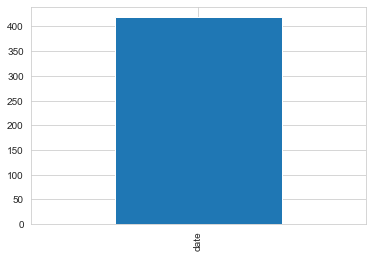

In [16]:
#Get the understanding of null values - which column has null values . Showing that in bar graph
try:
    sns.set_style("whitegrid")
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.bar()
except Exception as e:
    print("Dont have null values")
#     sys.exit(e)
    
    


In [17]:
#Get alll columns with Null values and print the percentage of that .
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0]
print('total number of fatures are having null values {}'.format(len(features_with_na)))

for feature in features_with_na:
    print(feature ,np.round(df[feature].isnull().mean(),4),'% missing value')

total number of fatures are having null values 1
date 0.1058 % missing value


In [18]:
# # Please uncomment this if you want to understnad the data based on any specific city or location.
# Leave this it as it is will analyse job vacancies across india.
# #Cleaning the location column as few jobs are not for the location of hyderabad . 

# location="Hyderabad"
# df['Hyd_location']=df['location'].str.contains(location)
# df = df[df['Hyd_location']].reset_index(drop=True)
# df.head()   

In [19]:
### Data Analysis - Based on skills

In [20]:
from collections import Counter 
dataset_skills=df['skill'].sum()
allskills=dataset_skills.upper()
skills = allskills.split(",")   
Counter = Counter(skills) 
most_occur = Counter.most_common(10) 
print(most_occur) 

[(" 'DATA SCIENCE'", 4650), (" 'MACHINE LEARNING'", 2297), (" 'PYTHON'", 982), (" 'TABLEAU'", 745), (" 'ARCHITECTURE'", 641), (" 'INTERN'", 626), (" 'DATA ANALYTICS'", 594), (" 'STATISTICAL ANALYSIS'", 594), (" 'BIG DATA'", 570), (" 'CONSULTING'", 475)]


In [33]:
HotSkills = pd.DataFrame(Counter.most_common(30) ,
                             columns=['skill', 'count'])

HotSkills

,skill,count
0,'DATA SCIENCE',4650
1,'MACHINE LEARNING',2297
2,'PYTHON',982
3,'TABLEAU',745
4,'ARCHITECTURE',641
5,'INTERN',626
6,'DATA ANALYTICS',594
7,'STATISTICAL ANALYSIS',594
8,'BIG DATA',570
9,'CONSULTING',475


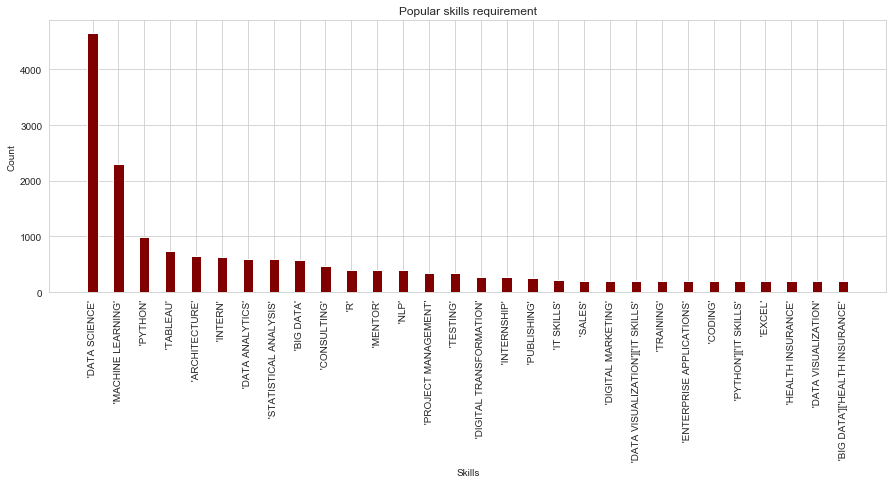

In [34]:
fig = plt.figure(figsize = (15, 5)) 

# creating the bar plot 
plt.bar(HotSkills['skill'], HotSkills['count'], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Skills") 
plt.ylabel("Count") 
plt.title("Popular skills requirement") 
plt.xticks(rotation=90)
plt.show() 

### Data Analysis - Based on Number of employer and number of vacany

In [23]:
#Groping data based on company and aggregating it.
dataset_final=df.groupby(['company']).agg({'company':['count'],'skill': ['sum']})
dataset_final.sort_values(by=[('company', 'count')], inplace=True,ascending=False)

#Get the vacancy count of each employer and necessary skills required for them.
dataset_final

,company,skill
,count,sum
company,,
Accenture Solutions Pvt Ltd,1386,"['IT Skills', 'Data Science', 'Machine Learnin..."
Springboard,396,"['SAN', 'Health insurance', 'data science', 'C..."
Codemonk,198,"['IT Skills', 'Python', 'Machine Learning', 'T..."
Eighteen Pixels India Private Limited,198,"['Artificial Intelligence', 'Natural Language ..."
Larsen Toubro Limited,198,"['Tensorflow', 'Data Science', 'R', 'NLP', 'Ke..."
Merkle Inc.,198,"['IT Skills', 'Python', 'Data Science', 'Table..."
NeenOpal Intelligent Solutions Pvt. Ltd.,198,"['data science', 'Intern', 'Coding', 'Machine ..."
Reliance Industries Ltd,198,['Data Science']['Data Science']['Data Science...


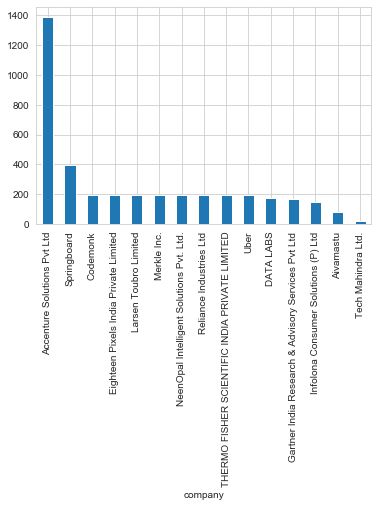

In [24]:
dataset_final[('company', 'count')].plot.bar()

### Data Analysis - Based on Number of vacancies and skills required for each employer

In [32]:
#Groping data based on company and aggregating it.
dataset_final=df.groupby(['company','expirence']).agg({'company':['count'],'skill': ['sum']})
dataset_final.sort_values(by=[('company', 'count')], inplace=True,ascending=False)

#Get the vacancy count of each employer and necessary skills required for them.
dataset_final

company  \
                                                               count   
company                                            expirence           
Accenture Solutions Pvt Ltd                        5-8 Yrs       571   
Springboard                                        0-3 Yrs       396   
Accenture Solutions Pvt Ltd                        7-11 Yrs      372   
                                                   10-14 Yrs     198   
Larsen Toubro Limited                              4-8 Yrs       198   
THERMO FISHER SCIENTIFIC INDIA PRIVATE LIMITED     0-1 Yrs       198   
Reliance Industries Ltd                            2-6 Yrs       198   
NeenOpal Intelligent Solutions Pvt. Ltd.           0-1 Yrs       198   
Merkle Inc.                                        0-1 Yrs       198   
Uber                                               5-10 Yrs      198   
Eighteen Pixels India Private Limited              0-5 Yrs       198   
Codemonk                                           0-1 Yrs       198   
Accenture Solutions Pvt Ltd                        5-7 Yrs       198   
DATA LABS                                          0-1 Yrs       175   
Gartner India Research & Advisory Services Pvt Ltd 0-3 Yrs       166   
Infolona Consumer Solutions (P) Ltd                0-2 Yrs       151   
Aivamastu                                          0-1 Yrs        79   
Accenture Solutions Pvt Ltd                        3-5 Yrs        47   
Tech Mahindra Ltd.                                 3-8 Yrs        23   

                                                                                                          skill  
                                                                                                            sum  
company                                            expirence                                                     
Accenture Solutions Pvt Ltd                        5-8 Yrs    ['IT Skills', 'Data Science', 'Machine Learnin...  
Springboard                                        0-3 Yrs    ['SAN', 'Health insurance', 'data science', 'C...  
Accenture Solutions Pvt Ltd                        7-11 Yrs   ['IT Skills', 'Data Science', 'Machine Learnin...  
                                                   10-14 Yrs  ['IT Skills', 'Data Science', 'Machine Learnin...  
Larsen Toubro Limited                              4-8 Yrs    ['Tensorflow', 'Data Science', 'R', 'NLP', 'Ke...  
THERMO FISHER SCIENTIFIC INDIA PRIVATE LIMITED     0-1 Yrs    ['Data Science', 'R', 'Sales', 'Digital Market...  
Reliance Industries Ltd                            2-6 Yrs    ['Data Science']['Data Science']['Data Science...  
NeenOpal Intelligent Solutions Pvt. Ltd.           0-1 Yrs    ['data science', 'Intern', 'Coding', 'Machine ...  
Merkle Inc.                                        0-1 Yrs    ['IT Skills', 'Python', 'Data Science', 'Table...  
Uber                                               5-10 Yrs   ['Computer science', 'Product engineering', 'd...  
Eighteen Pixels India Private Limited              0-5 Yrs    ['Artificial Intelligence', 'Natural Language ...  
Codemonk                                           0-1 Yrs    ['IT Skills', 'Python', 'Machine Learning', 'T...  
Accenture Solutions Pvt Ltd                        5-7 Yrs    ['IT Skills', 'Python', 'Data Science', 'Strat...  
DATA LABS                                          0-1 Yrs    ['IT Skills', 'Python', 'Testing', 'Tableau', ...  
Gartner India Research & Advisory Services Pvt Ltd 0-3 Yrs    ['IT Skills', 'Java', 'Python', 'Testing', 'Da...  
Infolona Consumer Solutions (P) Ltd                0-2 Yrs    ['Health insurance', 'Data analysis', 'data sc...  
Aivamastu                                          0-1 Yrs    ['data science', 'Intern', 'Consulting', 'Inte...  
Accenture Solutions Pvt Ltd                        3-5 Yrs    ['IT Skills', 'Python', 'Data Science', 'Publi...  
Tech Mahindra Ltd.                                 3-8 Yrs    ['Data Science', 'Da

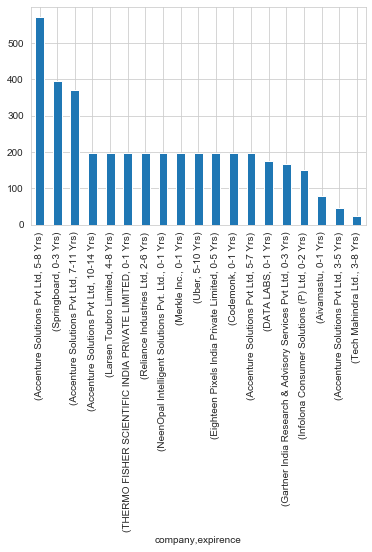

In [26]:
dataset_final[('company', 'count')].plot.bar()

### Data Analysis - Based on Number of vacancies and location 

In [27]:
#Groping data based on company and aggregating it.
dataset_final=df.groupby(['location']).agg({'location':['count'],'skill': ['sum']})
dataset_final.sort_values(by=[('location', 'count')], inplace=True,ascending=False)
# dataset_final.rename(columns = {('location', 'count'):'No of vacancies', ('skill', 'count'):'Skills Require'}, inplace = True) 

dataset_final

,location,skill
,count,sum
location,,
Bengaluru,1924,"['IT Skills', 'Python', 'Machine Learning', 'T..."
Mumbai,641,"['Data Science', 'R', 'Sales', 'Digital Market..."
Pune,396,"['IT Skills', 'Python', 'Testing', 'Tableau', ..."
Remote,396,"['SAN', 'Health insurance', 'data science', 'C..."
Delhi NCR(Lodhi Colony),198,"['Artificial Intelligence', 'Natural Language ..."
Gurgaon Gurugram,175,"['IT Skills', 'Data Science', 'Machine Learnin..."
Gurgaon,151,"['Health insurance', 'Data analysis', 'data sc..."
Visakhapatnam,79,"['data science', 'Intern', 'Consulting', 'Inte..."


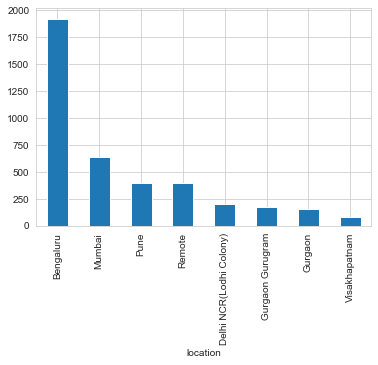

In [28]:
dataset_final[('location','count')].plot.bar()

In [29]:
# Saving the processed data based on the above analysis in processed_csv_file.csv file
dataset_final.to_csv(processed_csv_file)